# Biblioteca

In [1]:
import pandas as pd
import sklearn
import numpy as np
import statsmodels 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
sns.set(rc={'figure.figsize':(12,7)})
sns.set_style("whitegrid")
sns.set_palette("husl")

# Dados

In [3]:
dados_treino = pd.read_csv("porto_seguro_limpo_treino.csv")
dados_teste = pd.read_csv("porto_seguro_limpo_teste.csv")

In [4]:
X_treino = dados_treino.drop(["id", "target"], 1)
y_treino = dados_treino.loc[:, ["target"]]

X_teste = dados_teste.drop(["id", "target"], 1)
y_teste = dados_teste.loc[:, ["target"]]

# Previsão

In [5]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

parametros_tunados = [{'n_estimators': [50, 100],
                     'max_depth': [1, 3, 5],
                     'max_features': [3, 5, 10]}]

model = GridSearchCV(RandomForestClassifier(), parametros_tunados, cv=3, scoring='roc_auc')

# Resultados

In [6]:
from sklearn.metrics import roc_auc_score

result = model.fit(X_treino, y_treino)

print("Parâmetros escolhidos:")
print()
print(model.best_params_)
print()
print("Grid scores:")
print()
media = model.cv_results_['mean_test_score']
desv_pad = model.cv_results_['std_test_score']
for media, desv_pad, params in zip(media, desv_pad, model.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
        % (media, desv_pad * 2, params))
print()
auc = roc_auc_score(y_teste, result.predict_proba(X_teste)[:, 1])
print("AUC: %.4f" % auc)

Parâmetros escolhidos:

{'max_depth': 5, 'max_features': 3, 'n_estimators': 100}

Grid scores:

0.617 (+/-0.002) for {'max_depth': 1, 'max_features': 3, 'n_estimators': 50}
0.618 (+/-0.005) for {'max_depth': 1, 'max_features': 3, 'n_estimators': 100}
0.615 (+/-0.006) for {'max_depth': 1, 'max_features': 5, 'n_estimators': 50}
0.617 (+/-0.004) for {'max_depth': 1, 'max_features': 5, 'n_estimators': 100}
0.611 (+/-0.002) for {'max_depth': 1, 'max_features': 10, 'n_estimators': 50}
0.613 (+/-0.008) for {'max_depth': 1, 'max_features': 10, 'n_estimators': 100}
0.621 (+/-0.003) for {'max_depth': 3, 'max_features': 3, 'n_estimators': 50}
0.622 (+/-0.002) for {'max_depth': 3, 'max_features': 3, 'n_estimators': 100}
0.623 (+/-0.002) for {'max_depth': 3, 'max_features': 5, 'n_estimators': 50}
0.624 (+/-0.001) for {'max_depth': 3, 'max_features': 5, 'n_estimators': 100}
0.621 (+/-0.004) for {'max_depth': 3, 'max_features': 10, 'n_estimators': 50}
0.622 (+/-0.004) for {'max_depth': 3, 'max_featur

In [7]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, max_depth=3, max_features=5)

In [8]:
from sklearn.metrics import roc_auc_score

result = rf.fit(X_treino, y_treino)

auc = roc_auc_score(y_teste, result.predict_proba(X_teste)[:, 1])
print("AUC: %.4f" % auc)

AUC: 0.6194


Text(0.5,0,'Importância relativa')

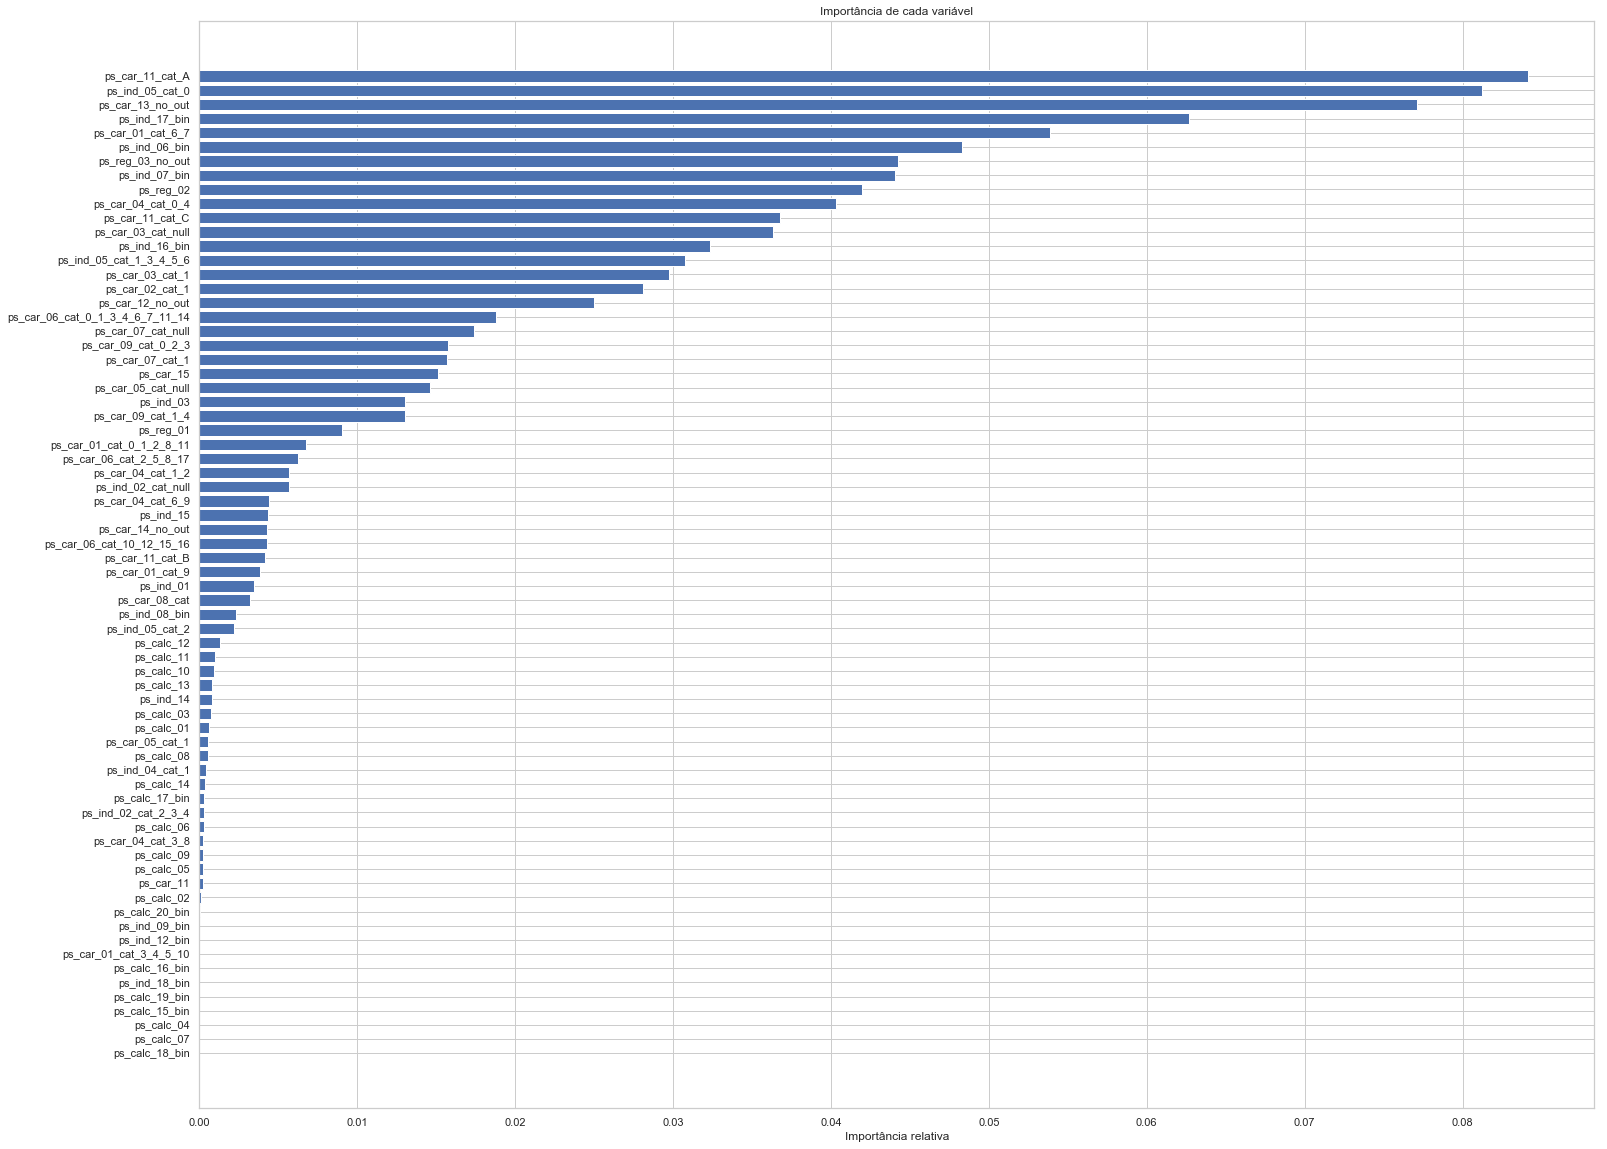

In [9]:
sns.set(rc={'figure.figsize':(25,20)})
sns.set_style("whitegrid")
sns.set_palette("husl")


importances = rf.feature_importances_
indices = np.argsort(importances)
features = X_treino.columns

plt.figure(1)
plt.title('Importância de cada variável')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Importância relativa')

# Tree 1

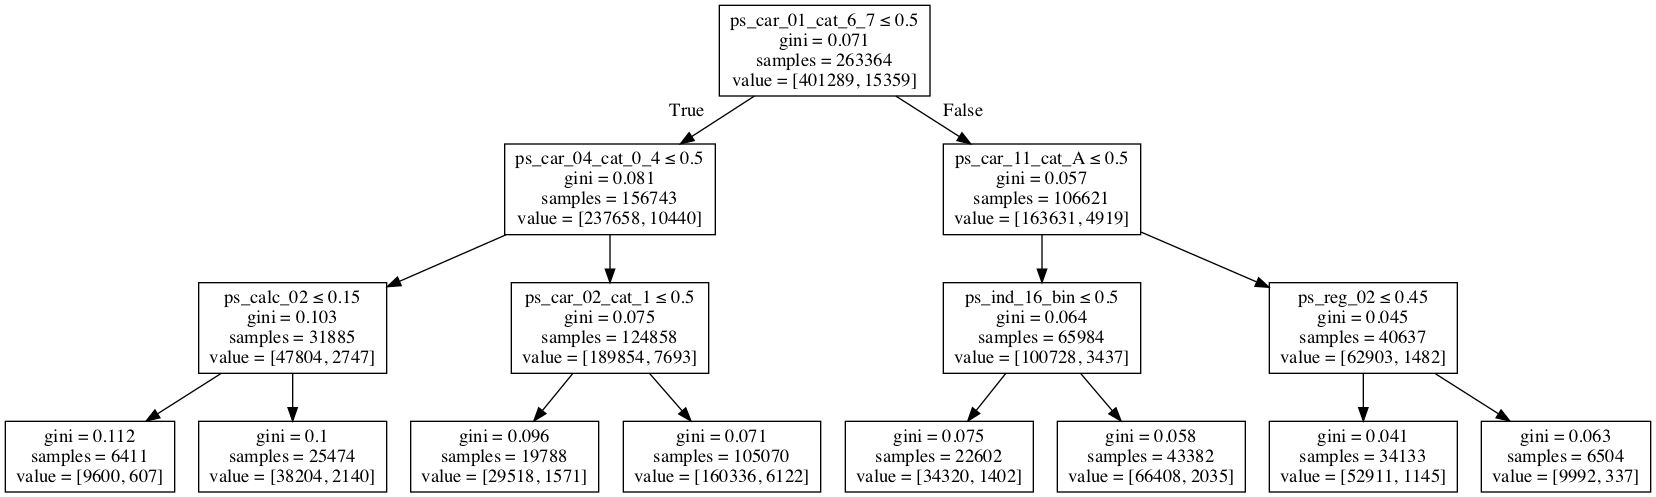

In [10]:
from sklearn import tree
from sklearn.tree import export_graphviz
from IPython.display import Image
from IPython import display
import graphviz
import pydot

tree.export_graphviz(rf.estimators_[0], 
                     feature_names=X_treino.columns, 
                     special_characters=True,
                     out_file='tree_from_forest.dot')
(graph,) = pydot.graph_from_dot_file('tree_from_forest.dot')
graph.write_png('tree_from_forest.png')

Image(graph.create_png())

# Tree 2

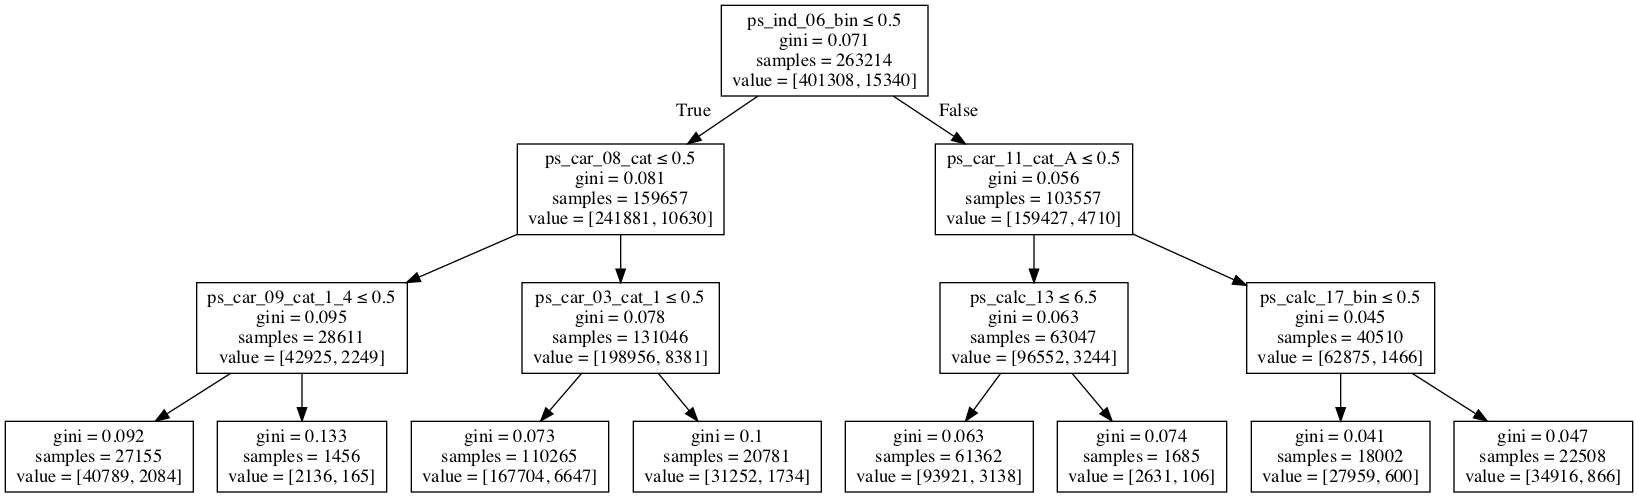

In [11]:
from sklearn import tree
from sklearn.tree import export_graphviz
from IPython.display import Image
from IPython import display
import graphviz
import pydot

tree.export_graphviz(rf.estimators_[1], 
                     feature_names=X_treino.columns, 
                     special_characters=True,
                     out_file='tree_from_forest.dot')
(graph,) = pydot.graph_from_dot_file('tree_from_forest.dot')
graph.write_png('tree_from_forest.png')

Image(graph.create_png())

# Tree 3

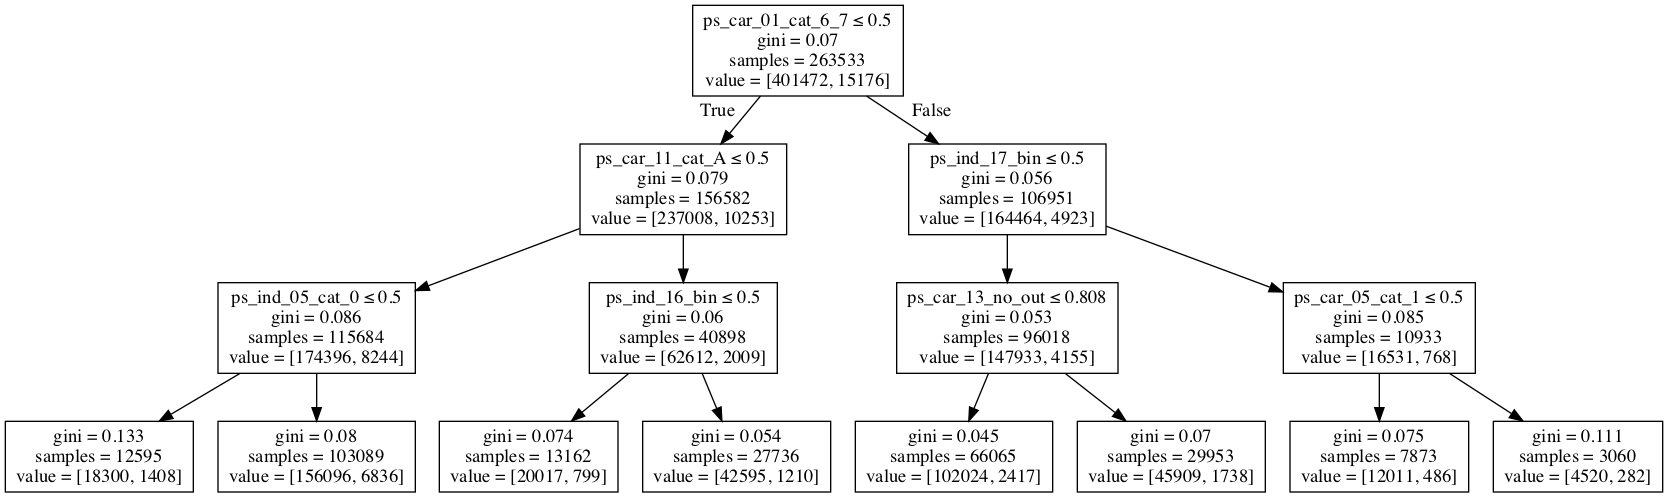

In [12]:
from sklearn import tree
from sklearn.tree import export_graphviz
from IPython.display import Image
from IPython import display
import graphviz
import pydot

tree.export_graphviz(rf.estimators_[2], 
                     feature_names=X_treino.columns, 
                     special_characters=True,
                     out_file='tree_from_forest.dot')
(graph,) = pydot.graph_from_dot_file('tree_from_forest.dot')
graph.write_png('tree_from_forest.png')

Image(graph.create_png(), width=4000, height=3000)

# Comentários